# Problem Statement

Input problem statement here 

DSIR-1116 Ames Housing Regression Challenge

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

### Background

Kaggle leaderboard standings will be determined by **root mean squared error** (RMSE).

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import statsmodels.api as sm
import sklearn.metrics as metrics

### Data Sets

In [2]:
s_train = pd.read_csv('datasets/train.csv')
s_test = pd.read_csv('datasets/test.csv')

### Functions

In [3]:
def clean_header(df):
    
    '''This function removes wierd characters and spaces from columns and keeps everything lowercase'''
    
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')','')

### Exploratory Data Analysis (EDA)

In [4]:
s_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
s_train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [66]:
# clean header script
clean_header(s_train)
clean_header(s_test)
s_train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,0.0,13517,Pave,0,IR1,Lvl,...,0,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,0,IR1,Lvl,...,0,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,0,Reg,Lvl,...,0,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,0,Reg,Lvl,...,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,0,IR1,Lvl,...,0,0,0,0,0,0,3,2010,WD,138500


In [69]:
s_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2006,WD,181469.701609
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,8,2006,WD,181469.701609
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,9,2006,New,181469.701609
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,7,2007,WD,181469.701609
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,185,0,NaN,NaN,NaN,0,7,2009,WD,181469.701609


In [70]:
s_train.isnull().sum()

id              0
pid             0
ms_subclass     0
ms_zoning       0
lot_frontage    0
               ..
misc_val        0
mo_sold         0
yr_sold         0
sale_type       0
saleprice       0
Length: 81, dtype: int64

In [8]:
s_train['saleprice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

In [9]:
s_train['ms_subclass'].describe()

count    2051.000000
mean       57.008776
std        42.824223
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: ms_subclass, dtype: float64

In [10]:
s_train['ms_zoning'].describe()

count     2051
unique       7
top         RL
freq      1598
Name: ms_zoning, dtype: object

In [11]:
# May not use this as it has a lot of missing data 
# and lot area is probably more useful anyway
s_train['lot_frontage'].describe()

count    1721.000000
mean       69.055200
std        23.260653
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: lot_frontage, dtype: float64

In [12]:
s_train['lot_area'].describe()

count      2051.000000
mean      10065.208191
std        6742.488909
min        1300.000000
25%        7500.000000
50%        9430.000000
75%       11513.500000
max      159000.000000
Name: lot_area, dtype: float64

In [13]:
s_train['street'].describe()

count     2051
unique       2
top       Pave
freq      2044
Name: street, dtype: object

In [14]:
s_train['overall_qual'].describe()

count    2051.000000
mean        6.112140
std         1.426271
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: overall_qual, dtype: float64

In [15]:
s_train['overall_cond'].describe()

count    2051.000000
mean        5.562165
std         1.104497
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: overall_cond, dtype: float64

In [16]:
s_train['year_built'].describe()

count    2051.000000
mean     1971.708922
std        30.177889
min      1872.000000
25%      1953.500000
50%      1974.000000
75%      2001.000000
max      2010.000000
Name: year_built, dtype: float64

In [17]:
s_train['exter_qual'].describe()

count     2051
unique       4
top         TA
freq      1247
Name: exter_qual, dtype: object

In [18]:
s_train['bsmtfin_type_1'].describe()

count     1996
unique       6
top        GLQ
freq       615
Name: bsmtfin_type_1, dtype: object

In [19]:
s_train['yr_sold'].describe()

count    2051.000000
mean     2007.775719
std         1.312014
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: yr_sold, dtype: float64

In [20]:
s_train['sale_type'].describe()

count     2051
unique       9
top        WD 
freq      1781
Name: sale_type, dtype: object

In [21]:
s_train['sale_type'].unique()

array(['WD ', 'New', 'COD', 'ConLD', 'Con', 'CWD', 'Oth', 'ConLI',
       'ConLw'], dtype=object)

In [23]:
s_train.isnull().sum()

id                0
pid               0
ms_subclass       0
ms_zoning         0
lot_frontage    330
               ... 
misc_val          0
mo_sold           0
yr_sold           0
sale_type         0
saleprice         0
Length: 81, dtype: int64

In [71]:
# Notes: 
# Group together sq ft measurements into a df
# Overall Quality of specific features (that tend to have a bigger effect on price)
# Num of kitchen, bedrooms on each level, Fireplaces
# Lot size, frontage? shape, contour, config, slope
# Types of materials on house

In [25]:
s_train.fillna(0, inplace=True)

In [26]:
s_train.isnull().sum()

id              0
pid             0
ms_subclass     0
ms_zoning       0
lot_frontage    0
               ..
misc_val        0
mo_sold         0
yr_sold         0
sale_type       0
saleprice       0
Length: 81, dtype: int64

In [27]:
df_lots = s_train[['lot_frontage', 'lot_area', 'lot_config', 'lot_shape']]

In [72]:
df_lots_grouped = df_lots.groupby(['lot_shape'])

In [73]:
df_lots_grouped.mean()

,lot_frontage,lot_area
lot_shape,,
IR1,50.547688,11470.709538
IR2,38.890909,19995.454545
IR3,77.111111,21102.222222
Reg,62.572973,8815.707336


In [74]:
# Changing like qualitative data to numeric for easier analysis 
s_train[['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'kitchen_qual', 'garage_qual', 'garage_cond']] = s_train[['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'kitchen_qual', 'garage_qual', 'garage_cond']].replace({'Ex':1, 'Gd':2, 'Ta':3, 'Fa':4, 'Po':5, 'NA':0})

# df['outcome_dummy'] = df['outcome'].replace({"Alive":0, "Dead":1})

In [31]:
# df_qual = s_train[['overall_quality', '']]

In [32]:
s_train['overall_qual'].describe()

count    2051.000000
mean        6.112140
std         1.426271
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: overall_qual, dtype: float64

In [33]:
#Trying out a very small model first. 
train_feat = s_train[['overall_cond', 'overall_qual']]
test_feat = s_test[['overall_cond', 'overall_qual']]
print(train_feat)
print(test_feat)

      overall_cond  overall_qual
0                8             6
1                5             7
2                7             5
3                5             5
4                8             6
...            ...           ...
2046             5             8
2047             5             4
2048             6             6
2049             5             4
2050             5             7

[2051 rows x 2 columns]
     overall_cond  overall_qual
0               8             6
1               4             5
2               5             7
3               6             5
4               5             6
..            ...           ...
873             6             6
874             7             6
875             5             5
876             6             4
877             5             5

[878 rows x 2 columns]


In [34]:
X_train = train_feat
X_test = test_feat
print(X_train.shape)
print(X_test.shape)

(2051, 2)
(878, 2)


In [35]:
y_train = s_train['saleprice']
y_test = s_test['saleprice']
print(y_train.shape)
print(y_test.shape)

(2051,)
(878,)


In [36]:
y_test

0      181469.701609
1      181469.701609
2      181469.701609
3      181469.701609
4      181469.701609
           ...      
873    181469.701609
874    181469.701609
875    181469.701609
876    181469.701609
877    181469.701609
Name: saleprice, Length: 878, dtype: float64

In [37]:
lr = LinearRegression()

In [38]:
# cross_val_score(estimator=lr, X=X_train, y=y_train)

In [39]:
# cross_val_score(estimator=lr, X=X_train, y=y_train).mean()

In [40]:
# Fit the model on training data
lr.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = lr.predict(X_test)

In [42]:
# RMSE for testing
metrics.mean_squared_error(y_test, y_pred)

3729557995.132537

In [43]:
cross_val_score(estimator=lr, X=X_train, y=y_train)

array([0.63941277, 0.65527318, 0.65566575, 0.64292426, 0.60841285])

In [44]:
cross_val_score(estimator=lr, X=X_train, y=y_train).mean()

0.6403377640357033

In [45]:
# Training score
lr.score(X_train, y_train)

0.6412853172301677

In [46]:
# Testing score
lr.score(X_test, y_test)

0.0

In [47]:
# Let's create predictions!
train_preds = lr.predict(X_train)
test_preds = lr.predict(X_test)
print(train_preds)
print(test_preds)

[171076.31092744 222074.88649096 128975.34270332 ... 175525.11459714
  89098.77631406 222074.88649096]
[171076.31092744 135648.54820788 222074.88649096 131199.74453817
 177749.516432    86874.37447921  86874.37447921 128975.34270332
 222074.88649096 175525.11459714 177749.516432   173300.71276229
 177749.516432   222074.88649096 173300.71276229 131199.74453817
 175525.11459714 133424.14637303 175525.11459714 257502.64921052
 126750.94086847 131199.74453817 177749.516432   177749.516432
 219850.48465611 128975.34270332  91323.17814891 131199.74453817
 173300.71276229  44773.40625509  86874.37447921  89098.77631406
 217626.08282126 131199.74453817 222074.88649096 222074.88649096
  86874.37447921  84649.97264435 128975.34270332 222074.88649096
 177749.516432   222074.88649096 131199.74453817 128975.34270332
 219850.48465611  86874.37447921 222074.88649096 133424.14637303
 128975.34270332 133424.14637303 133424.14637303 257502.64921052
 266400.25654993 131199.74453817 133424.14637303 17107

In [48]:
metrics.r2_score(y_test, test_preds)

0.0

In [49]:
# MSE for training
metrics.mean_squared_error(y_true=y_train, y_pred=train_preds)

2252323655.7740097

In [50]:
# MSE for testing
metrics.mean_squared_error(y_true=y_test, y_pred=test_preds)

3729557995.132537

In [51]:
# RMSE for training
metrics.mean_squared_error(y_true=y_train, y_pred=train_preds, squared=False)

47458.65206444458

In [52]:
# RMSE for testing
metrics.mean_squared_error(y_true=y_test, y_pred=test_preds, squared=False)

61070.107214025236

In [53]:
# Look at the coefficients
lr.coef_

array([-2224.40183485, 44325.37005897])

In [54]:
scaler = StandardScaler()

In [55]:
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [56]:
model = sm.OLS(y_train, X_train).fit()

In [57]:
# plt.figure(figsize=(12, 6))
# plt.plot(X_train, ypreds) # regression line
# plt.plot(X_train, y, 'ro') # scatter plot showing actual data
# plt.title('Actual vs Predicted')
# plt.xlabel('Square Feet')
# plt.ylabel('Price')
# plt.show()

In [58]:
#sns.pairplot(data=s_train, y_vars = y_train, x_vars = X_train, diag_kind=None);

### New Data Frames from cleaned and merged data frames

### Data Visualization

The cheapest house sold for $181,470 and the most expensive for $181,470
The average sales price is $181,470, while median is $181,470


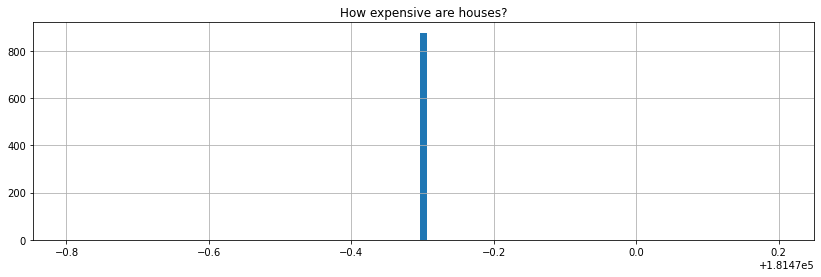

In [65]:
# How expensive are houses?
print('The cheapest house sold for ${:,.0f} and the most expensive for ${:,.0f}'.format(
    train.SalePrice.min(), train.SalePrice.max()))
print('The average sales price is ${:,.0f}, while median is ${:,.0f}'.format(
    train.SalePrice.mean(), train.SalePrice.median()))
train.SalePrice.hist(bins=75, rwidth=.8, figsize=(14,4))
plt.title('How expensive are houses?')
plt.show()

<AxesSubplot:>

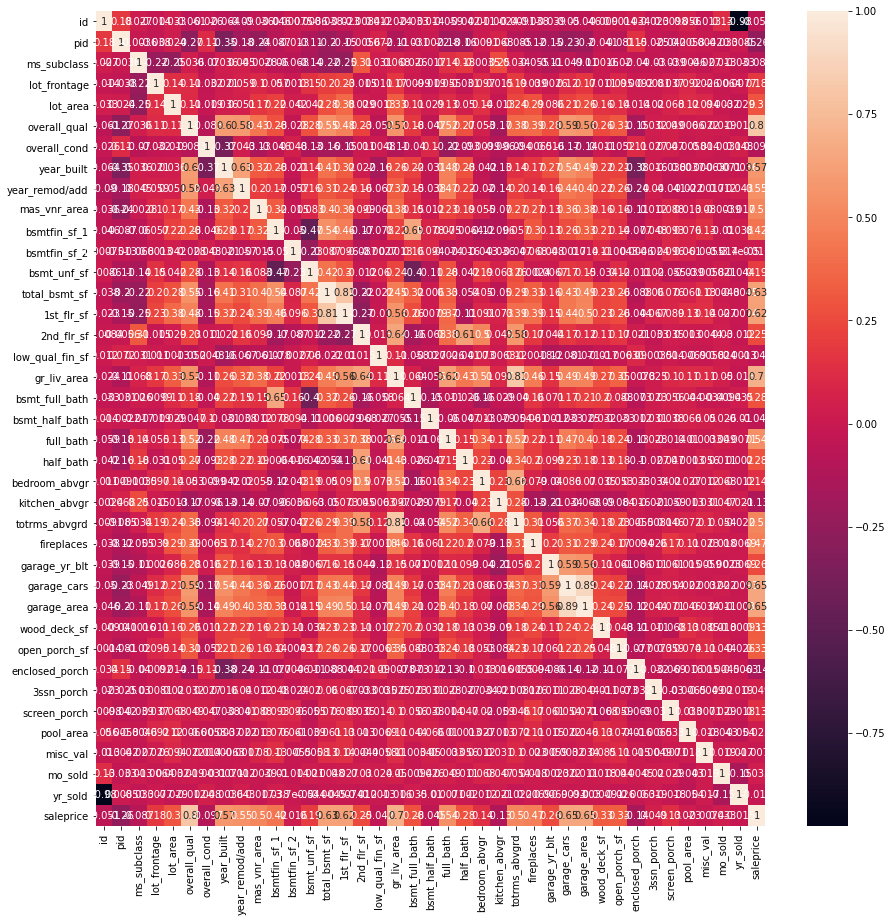

In [82]:
plt.figure(figsize=(15,15))
sns.heatmap(s_train.corr(), annot=True)

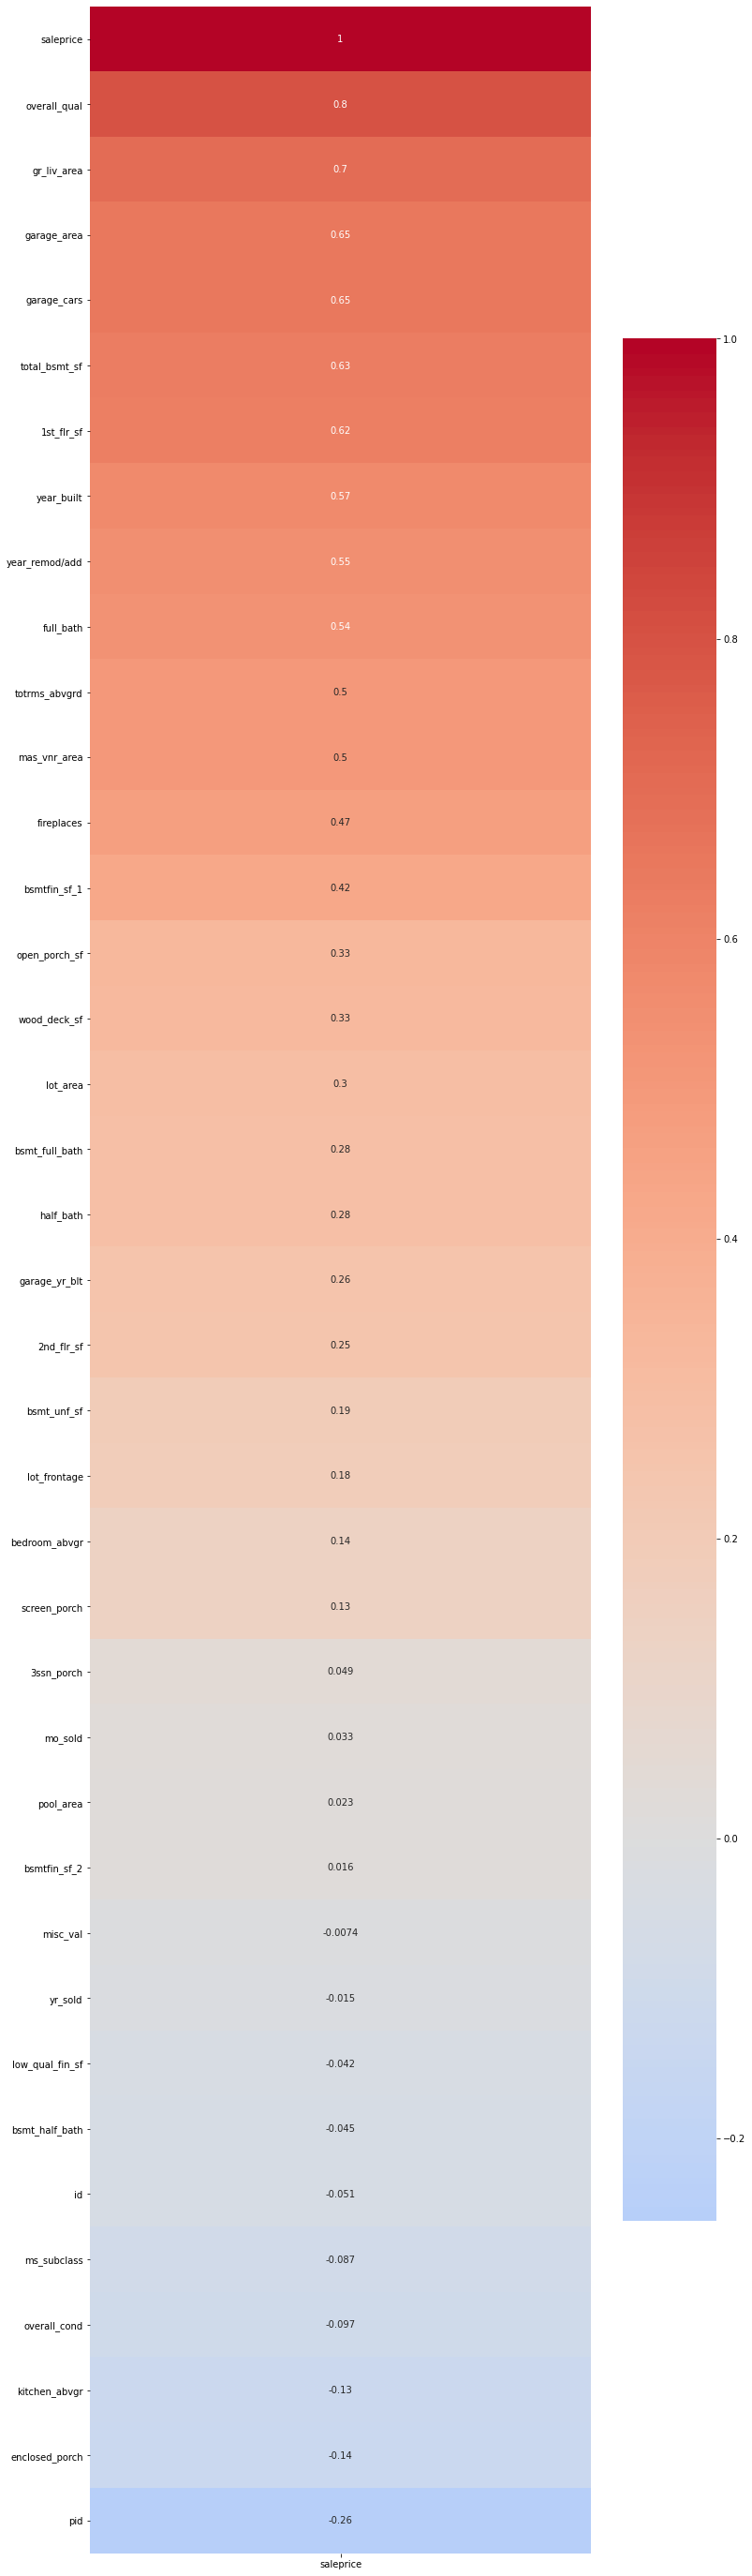

In [79]:
figure = plt.figure(figsize=(12,50))
sns.heatmap(s_train.corr()[['saleprice']].sort_values('saleprice',ascending=False),annot=True, cmap='coolwarm', center=0);

### Data Dictionary

### Conclusions and Recommendations

In [ ]:
#submission = test[['Id', 'SalePrice']].copy()

In [ ]:
#submission.to_csv('datasets/sample_submission_1.csv', index=False)